#Importing the required libraries

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#API key and the api endpoint url

In [11]:
API_KEY = 'API_KEY_GOES_HERE'
BASE_URL = 'https://api.themoviedb.org/3'

#Defining the functions to fetch all movies of 2023 and individual movie details

In [12]:
def fetch_movies_2023(page=1):
    url = f"{BASE_URL}/discover/movie"
    params = {
        'api_key': API_KEY,
        'primary_release_year': 2023,
        'with_original_language': 'en',
        'sort_by': 'popularity.desc',
        'page': page
    }
    response = requests.get(url, params=params)
    return response.json()

def fetch_movie_details(movie_id):
    url = f"{BASE_URL}/movie/{movie_id}"
    params = {'api_key': API_KEY}
    response = requests.get(url, params=params)
    return response.json()


#Collect movie data (fetch first 3 pages for demo)

In [13]:
all_movies = []
for page in range(1, 4):
    try:
        data = fetch_movies_2023(page)
        all_movies.extend(data.get('results', []))
        time.sleep(0.3)
    except Exception as e:
        print(f"Error fetching page {page}: {e}")


# Fetch detailed data for each movie

In [14]:
movies_data = []
for movie in all_movies:
    try:
        details = fetch_movie_details(movie['id'])
        movies_data.append({
            'title': details.get('title'),
            'budget': details.get('budget', 0),
            'revenue': details.get('revenue', 0),
            'genres': ', '.join([g['name'] for g in details.get('genres', [])]),
            'production_companies': ', '.join([p['name'] for p in details.get('production_companies', [])]),
            'release_date': details.get('release_date'),
            'runtime': details.get('runtime', 0),
            'popularity': details.get('popularity', 0)
        })
        time.sleep(0.3)
    except Exception as e:
        print(f"Error fetching details for movie ID {movie['id']}: {e}")

# Load into DataFrame

In [15]:
df = pd.DataFrame(movies_data)
df['ROI'] = df.apply(lambda row: (row['revenue'] - row['budget']) / row['budget'] if row['budget'] > 0 else 0, axis=1)


# Plot 1: Top 10 highest-grossing movies

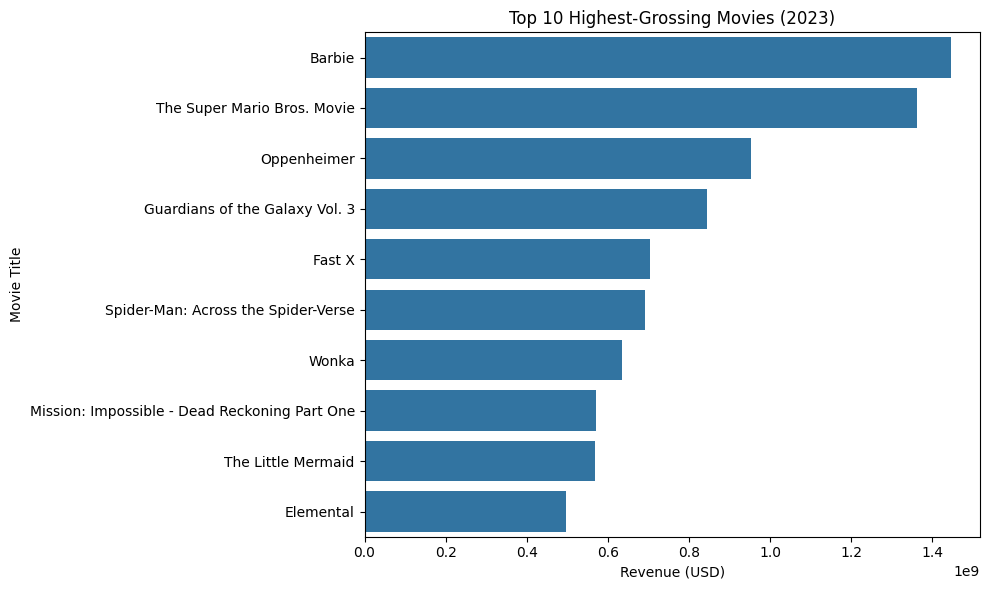

In [16]:
plt.figure(figsize=(10, 6))
top_10 = df.sort_values(by='revenue', ascending=False).head(10)
sns.barplot(x='revenue', y='title', data=top_10)
plt.title('Top 10 Highest-Grossing Movies (2023)')
plt.xlabel('Revenue (USD)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()


# Plot 2: Revenue vs Budget

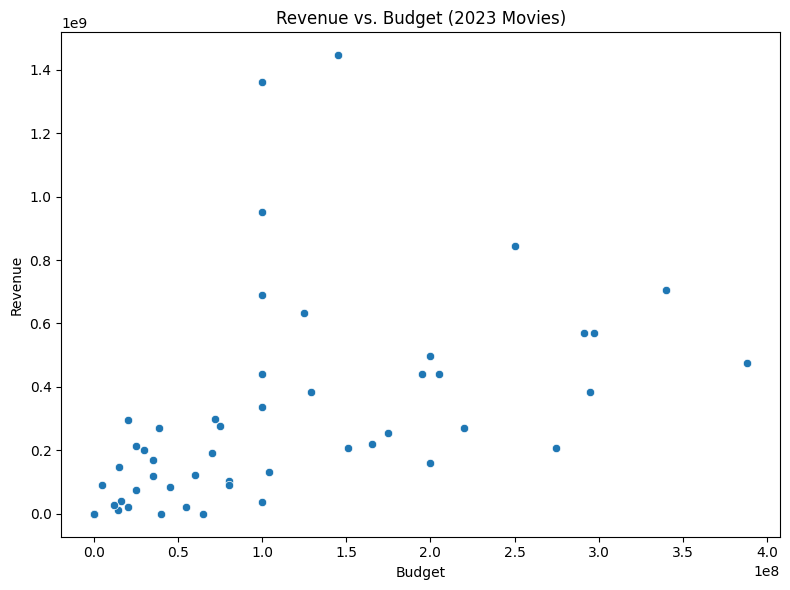

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Revenue vs. Budget (2023 Movies)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Plot 3: ROI by Genre

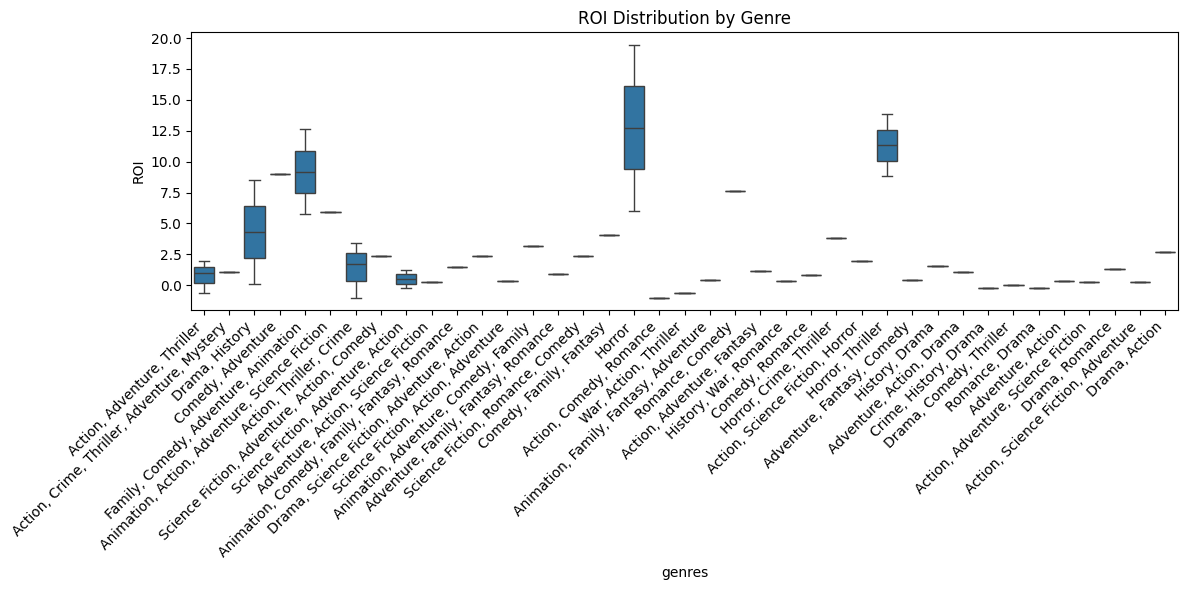

In [18]:
plt.figure(figsize=(12, 6))
genre_roi_df = df[df['ROI'] != 0].explode('genres')
sns.boxplot(data=genre_roi_df, x='genres', y='ROI')
plt.title('ROI Distribution by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 4: Avg revenue by production company

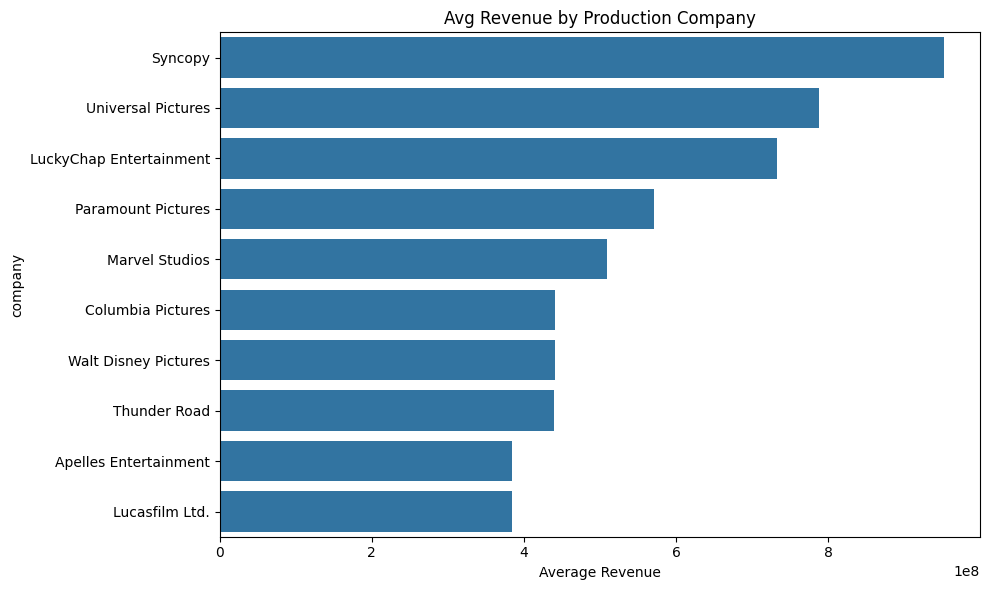

In [19]:
plt.figure(figsize=(10, 6))
df['company'] = df['production_companies'].str.split(',').str[0]
top_companies = df[df['company'] != ''].groupby('company')['revenue'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Avg Revenue by Production Company')
plt.xlabel('Average Revenue')
plt.tight_layout()
plt.show()

# Export to CSV

In [20]:
df.to_csv('hollywood_2023_dashboard_data.csv', index=False)
print("✅ Data saved to hollywood_2023_dashboard_data.csv")

✅ Data saved to hollywood_2023_dashboard_data.csv
